### 📌 **Machine Learning Model Performance Analysis Assignment**

#### 🎯 **Objective**  
The aim of this assignment is to **experiment with the step-by-step development of machine learning models** and to **observe the impact of various techniques on model performance**.

- For regression tasks: Housedata (Istanbul house price prediction)

---

### 🏠 **Dataset Description**

The dataset used in this assignment contains detailed real estate listings from **Istanbul, Turkey**. It includes a wide range of features related to residential properties, such as physical characteristics of the house, legal statuses, listing details, and financial eligibility indicators.

#### 📊 Key Attributes:

| Column Name                | Description |
|---------------------------|-------------|
| `district`                | The district (neighborhood) of the property |
| `price`                   | The listed price of the property (target variable) |
| `GrossSquareMeters`       | Total gross area of the property in square meters |
| `NetSquareMeters`         | Usable (net) area of the property in square meters |
| `NumberOfRooms`           | Number of rooms (e.g., 2+1, 3+1) |
| `BuildingAge`             | Age of the building |
| `FloorLocation`           | Floor on which the apartment is located |
| `NumberFloorsofBuilding`  | Total number of floors in the building |
| `HeatingType`             | Type of heating system (e.g., central, combi) |
| `CreditEligibility`       | Whether the property is eligible for mortgage loans |
| `InsideTheSite`           | Indicates whether the property is inside a residential complex |
| `UsingStatus`             | Current usage status (e.g., owner-occupied, tenant) |
| `EligibilityForInvestment`| Whether the property is considered suitable for investment |
| `AdCreationDate`          | Date the listing was created |
| `AdUpdateDate`            | Date the listing was last updated |
| `RentalIncome`            | Estimated rental income, if provided |
| `Balcony`, `NumberOfBalconies`, `BalconyType` | Balcony-related features |
| `StructureType`, `BuildStatus`, `TitleStatus`, `MortgageStatus`, `Swap` | Legal and structural attributes |
| ...and many others.

> Note: Some features contain a high proportion of missing values and may require preprocessing before being used in modeling.

---

This dataset enables a comprehensive exploration of **regression modeling** with **real-world property data**, allowing for meaningful performance comparisons among different machine learning approaches.


### ✅ **1. Data Preprocessing**

- **Explore the dataset**:
  - Are there any missing values?  
  - What is the distribution of the features?  
  - How is the target variable distributed?  
  - Should outlier analysis be performed?

---

In [406]:
from google.colab import drive

drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [407]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/drive/MyDrive/knn/HouseData.csv")

In [408]:
display(df.head(1))
print("\n")
display(df.tail(1))

,Unnamed: 0,district,price,address,AdUpdateDate,Category,GrossSquareMeters,BuildingAge,NumberFloorsofBuilding,UsingStatus,...,PriceStatus,RentalIncome,NumberOfBalconies,BalconyType,HallSquareMeters,WCSquareMeters,IsItVideoNavigable?,Subscription,BathroomSquareMeters,BalconySquareMeters
0,0,adalar,"3,100,000TL","['Anasayfa', 'Satılık Daire', 'İstanbul Satılı...",24 Şubat 2022,Satılık,160 m2,21 Ve Üzeri,3,Mülk Sahibi Oturuyor,...,Genel Fiyat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Unnamed: 0,district,price,address,AdUpdateDate,Category,GrossSquareMeters,BuildingAge,NumberFloorsofBuilding,UsingStatus,...,PriceStatus,RentalIncome,NumberOfBalconies,BalconyType,HallSquareMeters,WCSquareMeters,IsItVideoNavigable?,Subscription,BathroomSquareMeters,BalconySquareMeters
25154,25154,zeytinburnu,"1,000,000TL","['Anasayfa', 'Satılık Daire', 'İstanbul Satılı...",10 Aralık 2021,Satılık,55 m2,0 (Yeni),16,Boş,...,Genel Fiyat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [409]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25155 entries, 0 to 25154
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                25155 non-null  int64 
 1   district                  25155 non-null  object
 2   price                     25155 non-null  object
 3   address                   25155 non-null  object
 4   AdUpdateDate              25155 non-null  object
 5   Category                  25155 non-null  object
 6   GrossSquareMeters         25155 non-null  object
 7   BuildingAge               25155 non-null  object
 8   NumberFloorsofBuilding    25155 non-null  int64 
 9   UsingStatus               25155 non-null  object
 10  EligibilityForInvestment  21506 non-null  object
 11  BuildStatus               11231 non-null  object
 12  TitleStatus               9712 non-null   object
 13  ItemStatus                18332 non-null  object
 14  NumberOfBathrooms     

In [410]:
df.shape

(25155, 38)

In [411]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,25155.0,12577.000000,7261.767347,0.0,6288.5,12577.0,18865.5,25154.0
NumberFloorsofBuilding,25155.0,7.757782,6.952397,1.0,4.0,5.0,8.0,71.0


In [412]:
df.describe(include="object").T

,count,unique,top,freq
district,25155,39,sariyer,1449
price,25155,2825,"1,350,000TL",371
address,25155,1638,"['Anasayfa', 'Satılık Residence', 'İstanbul Sa...",452
AdUpdateDate,25155,186,04 Mart 2022,1605
Category,25155,1,Satılık,25155
GrossSquareMeters,25155,584,100 m2,1478
BuildingAge,25155,10,0 (Yeni),7333
UsingStatus,25155,3,Boş,11139
EligibilityForInvestment,21506,3,Bilinmiyor,12751
BuildStatus,11231,3,İkinci El,6409


In [413]:
df.isnull().sum()

,0
Unnamed: 0,0
district,0
price,0
address,0
AdUpdateDate,0
Category,0
GrossSquareMeters,0
BuildingAge,0
NumberFloorsofBuilding,0
UsingStatus,0


In [414]:
missing_values = df.isnull().mean() * 100

missing_percentage = df.isnull().mean() * 100

columns_to_drop = missing_percentage[missing_percentage > 70].index

In [415]:
columns_to_drop

Index(['MortgageStatus', 'RentalIncome', 'NumberOfBalconies', 'BalconyType',
       'HallSquareMeters', 'WCSquareMeters', 'IsItVideoNavigable?',
       'Subscription', 'BathroomSquareMeters', 'BalconySquareMeters'],
      dtype='object')

In [416]:
df = df.drop(columns=columns_to_drop)

print(f"Columns dropped: {columns_to_drop}")

Columns dropped: Index(['MortgageStatus', 'RentalIncome', 'NumberOfBalconies', 'BalconyType',
       'HallSquareMeters', 'WCSquareMeters', 'IsItVideoNavigable?',
       'Subscription', 'BathroomSquareMeters', 'BalconySquareMeters'],
      dtype='object')


In [417]:
df = df.drop(columns=["Unnamed: 0", "NumberOfWCs"])

In [418]:
df["Balcony"] = df["Balcony"].fillna(0)
df["Balcony"] = df["Balcony"].map({"Var": 1, "Yok": 0})

In [419]:
df["TitleStatus"].unique()

array([nan, 'Kat Mülkiyeti', 'Yok', 'Kat İrtifakı', 'Arsa',
       'Hisseli Tapu'], dtype=object)

In [420]:
df["TitleStatus"] = df["TitleStatus"].fillna(df["TitleStatus"].mode()[0])
df["TitleStatus"] = le.fit_transform(df["TitleStatus"])

In [421]:
object_columns = df.select_dtypes(include=['object']).columns

unique_values = {col: df[col].unique() for col in object_columns}

for col, values in unique_values.items():
    if len(values) < 60:
        print(f"{col}: {len(values)} unique values")
        print(f"Values: {values}\n")

district: 39 unique values
Values: ['adalar' 'arnavutkoy' 'atasehir' 'avcilar' 'bagcilar' 'bahcelievler'
 'bakirkoy' 'basaksehir' 'bayrampasa' 'besiktas' 'beykoz' 'beylikduzu'
 'beyoglu' 'buyukcekmece' 'catalca' 'cekmekoy' 'esenler' 'esenyurt'
 'eyupsultan' 'fatih' 'gaziosmanpasa' 'gungoren' 'kadikoy' 'kagithane'
 'kartal' 'kucukcekmece' 'maltepe' 'pendik' 'sancaktepe' 'sariyer' 'sile'
 'silivri' 'sisli' 'sultanbeyli' 'sultangazi' 'tuzla' 'umraniye' 'uskudar'
 'zeytinburnu']

Category: 1 unique values
Values: ['Satılık']

BuildingAge: 10 unique values
Values: ['21 Ve Üzeri' '5-10' '11-15' '2' '0 (Yeni)' '3' '4' '16-20' '1'
 '20 Ve Üzeri']

UsingStatus: 3 unique values
Values: ['Mülk Sahibi Oturuyor' 'Boş' 'Kiracı Oturuyor']

EligibilityForInvestment: 4 unique values
Values: ['Bilinmiyor' 'Yatırıma Uygun' nan 'Yatırıma Uygun Değil']

BuildStatus: 4 unique values
Values: [nan 'İkinci El' 'Sıfır' 'Yapım Aşamasında']

ItemStatus: 3 unique values
Values: ['Eşyalı' 'Boş' nan]

NumberOfBathro

In [422]:
df["BuildingAge"].unique()

array(['21 Ve Üzeri', '5-10', '11-15', '2', '0 (Yeni)', '3', '4', '16-20',
       '1', '20 Ve Üzeri'], dtype=object)

In [423]:
df["BuildingAge"] = df["BuildingAge"].map({"0 (Yeni)": 0,
                                           "1": 1,
                                           "2": 2,
                                           "3": 3,
                                           "4": 4,
                                           "5-10":5,
                                           "11-15":6,
                                           "16-20":7,
                                           "20 Ve Üzeri":8,
                                           "21 Ve Üzeri":8})

In [424]:
df["BuildingAge"].dtype

dtype('int64')

In [425]:
# df["EligibilityForInvestment"] = df["EligibilityForInvestment"].replace({"Bilinmiyor": np.nan}) -unnecessary

In [426]:
df["EligibilityForInvestment"].unique()

array(['Bilinmiyor', 'Yatırıma Uygun', nan, 'Yatırıma Uygun Değil'],
      dtype=object)

In [427]:
df["EligibilityForInvestment"].value_counts()

,count
EligibilityForInvestment,
Bilinmiyor,12751
Yatırıma Uygun,8720
Yatırıma Uygun Değil,35


In [428]:
df["EligibilityForInvestment"].isnull().sum()

np.int64(3649)

This will confuse the model very much, so let's consolidate the Yatırıma Uygun Değil with Bilinmiyor.

In [429]:
df["EligibilityForInvestment"] = df["EligibilityForInvestment"].replace({
    "Yatırıma Uygun Değil": "Bilinmiyor"
})

df["EligibilityForInvestment"] = df["EligibilityForInvestment"].fillna("Bilinmiyor")

df["EligibilityForInvestment"] = df["EligibilityForInvestment"].map({
    "Yatırıma Uygun": 1,
    "Bilinmiyor": 0
})

In [430]:
df["NumberOfRooms"].unique()

array(['3+1', '2+1', '8+ Oda', '3+2', '5+1', '5 Oda', '2+2', '7+3', '1+1',
       '5+3', '1 Oda', '6+1', '4+2', '5+2', '4+1', '6+2', '6+3', '2.5+1',
       'Stüdyo', '6+4', '7+1', '1.5+1', '2+0', '7+2', '3.5+1', '4.5+1',
       '5+4'], dtype=object)

In [431]:
df["NumberOfRooms"].value_counts().T

,count
NumberOfRooms,
2+1,9752
3+1,6868
1+1,2046
4+1,1687
4+2,1148
3+2,642
5+2,597
5+1,589
8+ Oda,324


In [432]:
df["NumberOfRooms"] = df["NumberOfRooms"].map({'3+1': 3,
                                              '2+1': 2,
                                              '8+ Oda': 8,
                                              '3+2': 3,
                                              '5+1': 5,
                                              '5 Oda': 5,
                                              '2+2': 2,
                                              '7+3': 7,
                                              '1+1': 1,
                                              '5+3': 5,
                                              '1 Oda': 1,
                                              '6+1': 6,
                                              '4+2': 4,
                                              '5+2': 5,
                                              '4+1': 4,
                                              '6+2': 6,
                                              '6+3': 6,
                                              '2.5+1': 2.5,
                                              'Stüdyo': 1,
                                              '6+4': 6,
                                              '7+1': 7,
                                              '1.5+1': 1.5,
                                              '2+0': 2,
                                              '7+2': 7,
                                              '3.5+1': 3.5,
                                              '4.5+1': 4.5,
                                              '5+4': 5
                                              })

In [433]:
df["CreditEligibility"].unique()

array(['Krediye Uygun', 'Krediye Uygun Değil', 'Bilinmiyor'], dtype=object)

In [434]:
df["CreditEligibility"].value_counts()

,count
CreditEligibility,
Krediye Uygun,22197
Krediye Uygun Değil,2568
Bilinmiyor,390


In [435]:
df["CreditEligibility"].isnull().sum()

np.int64(0)

In [436]:
df["CreditEligibility"] = df["CreditEligibility"].map({"Bilinmiyor": 0,
                                                       "Krediye Uygun Değil": 0,
                                                       "Krediye Uygun": 1})

In [437]:
df["FloorLocation"].unique()

array(['Çatı Katı', 'Bahçe Katı', 'Düz Giriş', 'Bahçe Dublex',
       'Villa Tipi', '1. Kat', 'Müstakil', '3. Kat', '2. Kat',
       'Çatı Dubleks', 'Yüksek Giriş', '5. Kat', '4. Kat', '7. Kat',
       'Kot 2 (-2). Kat', 'Kot 3 (-3). Kat', '8. Kat', '6. Kat',
       'Kot 1 (-1). Kat', '10. Kat', '32. Kat', '13. Kat', '14. Kat',
       '22. Kat', '16. Kat', '19. Kat', '9. Kat', '28. Kat', '15. Kat',
       '30-40. Kat', '12. Kat', 'Tam Bodrum', '11. Kat', '23. Kat',
       'Yarı Bodrum', '18. Kat', '33. Kat', '10-20. Kat', '21. Kat',
       '17. Kat', '26. Kat', '27. Kat', '20. Kat', '29. Kat', '25. Kat',
       '24. Kat', '31. Kat', 'Yüksek Bodrum', '20-30. Kat', '30. Kat',
       '36. Kat', '38. Kat', '34. Kat', '40+. Kat', '35. Kat'],
      dtype=object)

In [438]:
df["FloorLocation"] = df["FloorLocation"].map({'Çatı Katı': 6,
                                                    'Bahçe Katı': 0,
                                                    'Düz Giriş': 0,
                                                    'Bahçe Dublex': 1,
                                                    'Villa Tipi': 1,
                                                    '1. Kat': 1,
                                                    'Müstakil': 0,
                                                    '2. Kat': 2,
                                                    '3. Kat': 3,
                                                    '4. Kat': 4,
                                                    '5. Kat': 5,
                                                    '6. Kat': 6,
                                                    '7. Kat': 7,
                                                    '8. Kat': 8,
                                                    '9. Kat': 9,
                                                    '10. Kat': 10,
                                                    '11. Kat': 11,
                                                    '12. Kat': 12,
                                                    '13. Kat': 13,
                                                    '14. Kat': 14,
                                                    '15. Kat': 15,
                                                    '16. Kat': 16,
                                                    '17. Kat': 17,
                                                    '18. Kat': 18,
                                                    '19. Kat': 19,
                                                    '20. Kat': 20,
                                                    '21. Kat': 21,
                                                    '22. Kat': 22,
                                                    '23. Kat': 23,
                                                    '24. Kat': 24,
                                                    '25. Kat': 25,
                                                    '26. Kat': 26,
                                                    '27. Kat': 27,
                                                    '28. Kat': 28,
                                                    '29. Kat': 29,
                                                    '30. Kat': 30,
                                                    '31. Kat': 31,
                                                    '32. Kat': 32,
                                                    '33. Kat': 33,
                                                    '34. Kat': 34,
                                                    '35. Kat': 35,
                                                    '36. Kat': 36,
                                                    '38. Kat': 38,
                                                    '40+. Kat': 40,
                                                    '30-40. Kat': 35,
                                                    '10-20. Kat': 15,
                                                    'Tam Bodrum': -2,
                                                    'Yarı Bodrum': -1,
                                                    'Yüksek Bodrum': -0.5,
                                                    'Kot 1 (-1). Kat': -1,
                                                    'Kot 2 (-2). Kat': -2,
                                                    'Kot 3 (-3). Kat': -3,
                                                    'Yüksek Giriş': 0.5,
                                                    'Çatı Dubleks': 7
                                                       })

In [439]:
df["AdUpdateDate"].head(10)

,AdUpdateDate
0,24 Şubat 2022
1,02 Mart 2022
2,11 Şubat 2022
3,11 Şubat 2022
4,19 Ocak 2022
5,17 Ocak 2022
6,27 Şubat 2022
7,22 Şubat 2022
8,16 Aralık 2021
9,16 Aralık 2021


In [440]:
df["AdUpdateDate"] = df["AdUpdateDate"].str[2:].str.strip()

In [441]:
df["YearUpdated"] = df["AdUpdateDate"].str[-4:].astype(int)

In [442]:
df["MonthUpdated"] = df["AdUpdateDate"].str[:-4].str.strip()

df = df.drop(columns="AdUpdateDate")

In [443]:
print(df["YearUpdated"].unique())
print(df["MonthUpdated"].unique())

[2022 2021]
['Şubat' 'Mart' 'Ocak' 'Aralık' 'Kasım' 'Ekim' 'Eylül']


In [444]:
df["MonthUpdated"] = df["MonthUpdated"].map({
    "Ocak": 1,
    "Şubat": 2,
    "Mart": 3,
    "Eylül": 9,
    "Ekim": 10,
    "Kasım": 11,
    "Aralık": 12,
})

In [445]:
df["HeatingType"].value_counts()

,count
HeatingType,
Kombi Doğalgaz,17703
Merkezi (Pay Ölçer),4548
Merkezi Doğalgaz,1493
Yerden Isıtma,576
Isıtma Yok,285
Doğalgaz Sobalı,241
Sobalı,126
Klimalı,72
Kat Kaloriferi,70


In [446]:
threshold = 100

heating_counts = df['HeatingType'].value_counts()

rare_heatings = heating_counts[heating_counts < threshold].index.tolist()

df['HeatingType'] = df['HeatingType'].replace(rare_heatings, 'Other')

print(df['HeatingType'].value_counts())

HeatingType
Kombi Doğalgaz         17703
Merkezi (Pay Ölçer)     4548
Merkezi Doğalgaz        1493
Yerden Isıtma            576
Isıtma Yok               285
Doğalgaz Sobalı          241
Other                    183
Sobalı                   126
Name: count, dtype: int64


In [447]:
df.head(2)

,district,price,address,Category,GrossSquareMeters,BuildingAge,NumberFloorsofBuilding,UsingStatus,EligibilityForInvestment,BuildStatus,...,FloorLocation,HeatingType,CreditEligibility,InsideTheSite,StructureType,Swap,Balcony,PriceStatus,YearUpdated,MonthUpdated
0,adalar,"3,100,000TL","['Anasayfa', 'Satılık Daire', 'İstanbul Satılı...",Satılık,160 m2,8,3,Mülk Sahibi Oturuyor,0,NaN,...,6.0,Kombi Doğalgaz,1,Hayır,NaN,Yok,NaN,Genel Fiyat,2022,2
1,adalar,"1,600,000TL","['Anasayfa', 'Satılık Daire', 'İstanbul Satılı...",Satılık,120 m2,5,3,Mülk Sahibi Oturuyor,1,İkinci El,...,0.0,Kombi Doğalgaz,1,Hayır,Betonarme,Yok,1.0,Genel Fiyat,2022,3


In [448]:
print(df["NumberOfBathrooms"].unique())
print(df["NumberOfBathrooms"].isnull().sum())

['2' '1' '3' '4' '5' 'Yok' '6+']
0


In [449]:
df["NumberOfBathrooms"] = df["NumberOfBathrooms"].replace({"Yok": "0",
                                                           "6+": "6"}).astype(int)

In [450]:
print(df["NetSquareMeters"].head())
print(df["GrossSquareMeters"].head())

0    120 m2
1    100 m2
2    300 m2
3    540 m2
4    700 m2
Name: NetSquareMeters, dtype: object
0    160 m2
1    120 m2
2    350 m2
3    550 m2
4    840 m2
Name: GrossSquareMeters, dtype: object


In [451]:
df["NetSquareMeters"] = df["NetSquareMeters"].str[:-3]
df["NetSquareMeters"] = df["NetSquareMeters"].replace(".", '', regex=False) # Use regex=False for exact match
df["NetSquareMeters"] = df["NetSquareMeters"].astype(float)

df["GrossSquareMeters"] = df["GrossSquareMeters"].str[:-3]
df["GrossSquareMeters"] = df["GrossSquareMeters"].replace(".", '', regex=False)
df["GrossSquareMeters"] = df["GrossSquareMeters"].astype(float)

In [452]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['HeatingType'] = le.fit_transform(df['HeatingType'])
df["district"] = le.fit_transform(df["district"])
df["InsideTheSite"] = le.fit_transform(df["InsideTheSite"])
df["UsingStatus"] = le.fit_transform(df["UsingStatus"])

In [453]:
df = df.drop(columns=["Category", "AdCreationDate", "PriceStatus", "Type"])

### Data Visualizations

In [454]:
print(df["price"].min())
print(df["price"].max())
print(df["price"].nunique())

1,000,000TL
999,999TL
2825


In [455]:
df["price"].head()

,price
0,"3,100,000TL"
1,"1,600,000TL"
2,"18,500,000TL"
3,"9,500,000TL"
4,"25,000,000TL"


In [456]:
df["price"].dtype

dtype('O')

In [457]:
df["price"] = df["price"].str[:-2].str.strip()

In [458]:
df['price'] = df['price'].str.replace(r'[,\%\sarrow_downwardTL]+', '', regex=True).astype(float)

In [459]:
df["price"].head()

,price
0,3100000.0
1,1600000.0
2,18500000.0
3,9500000.0
4,25000000.0


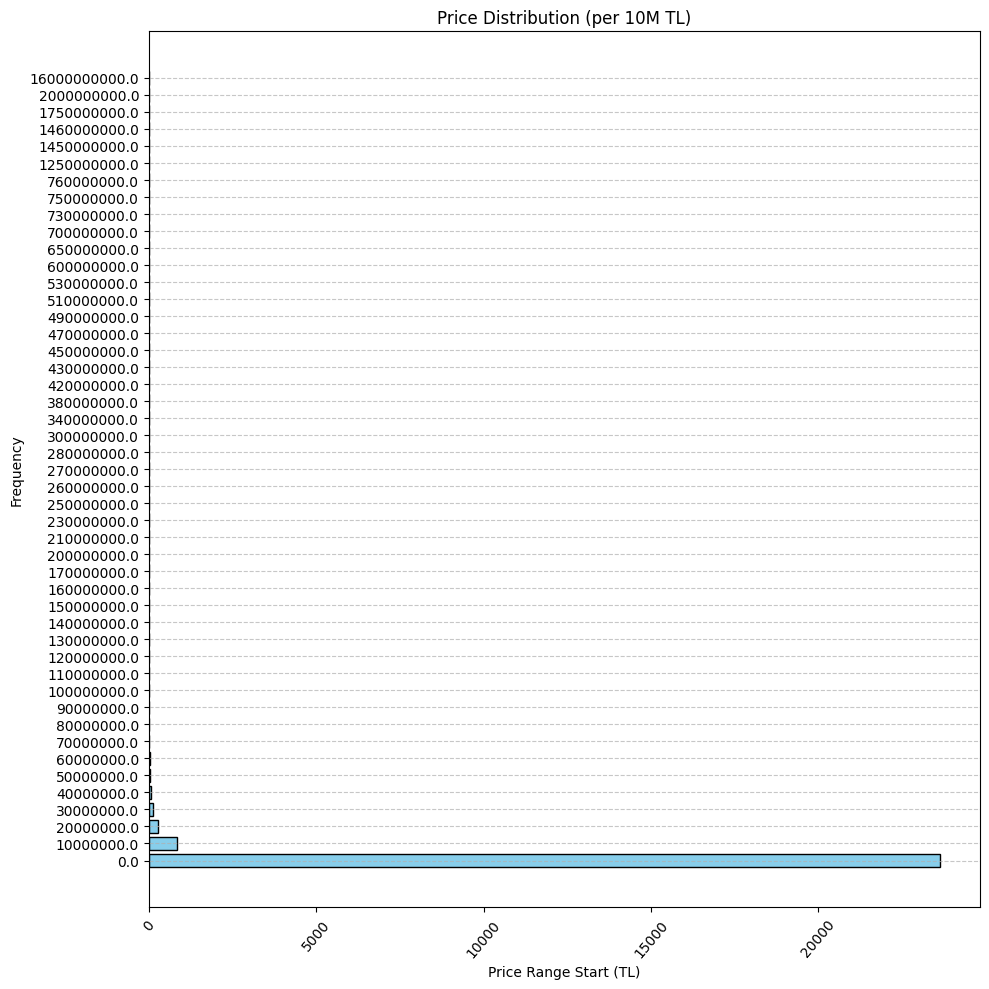

In [460]:
import matplotlib.pyplot as plt

df['price_bin'] = (df['price'] // 10000000) * 10000000

bin_counts = df['price_bin'].value_counts().sort_index()

plt.figure(figsize=(10, 10))
plt.barh(bin_counts.index.astype(str), bin_counts.values, color='skyblue', edgecolor='black')
plt.title('Price Distribution (per 10M TL)')
plt.xlabel('Price Range Start (TL)')
plt.ylabel('Frequency')
plt.xticks(rotation=50)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

df = df.drop(columns="price_bin")

Seems really unequally distributed.

In [461]:
df['price'] = np.log1p(df['price'])

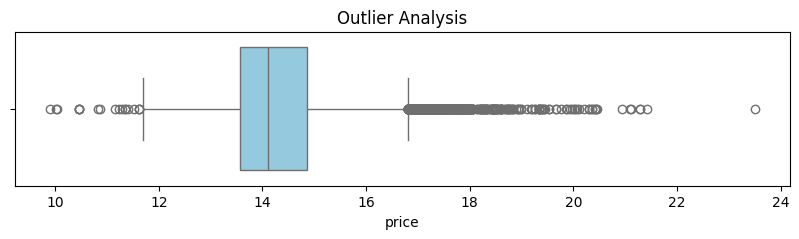

In [462]:
import seaborn as sns

# Boxplot çizimi
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['price'], color="skyblue")
plt.title("Outlier Analysis")
plt.show()

There are a lot of outliers, let's handle them with logarithmic clipping.

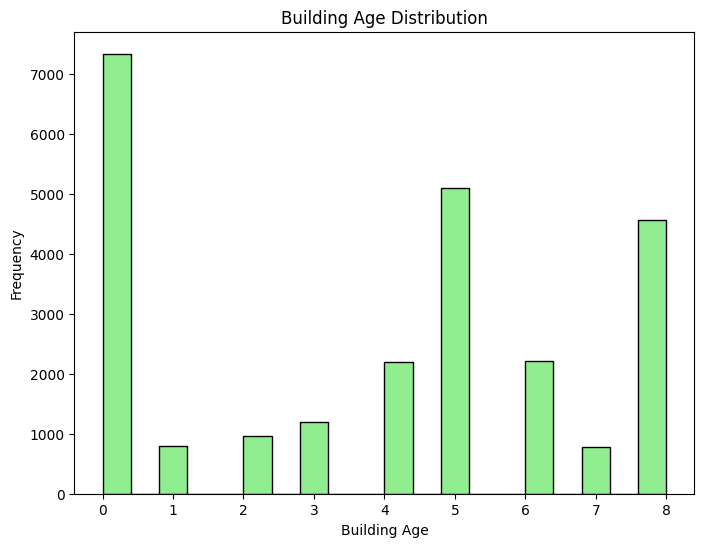

In [463]:
plt.figure(figsize=(8, 6))
plt.hist(df['BuildingAge'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Building Age Distribution')
plt.xlabel('Building Age')
plt.ylabel('Frequency')
plt.show()

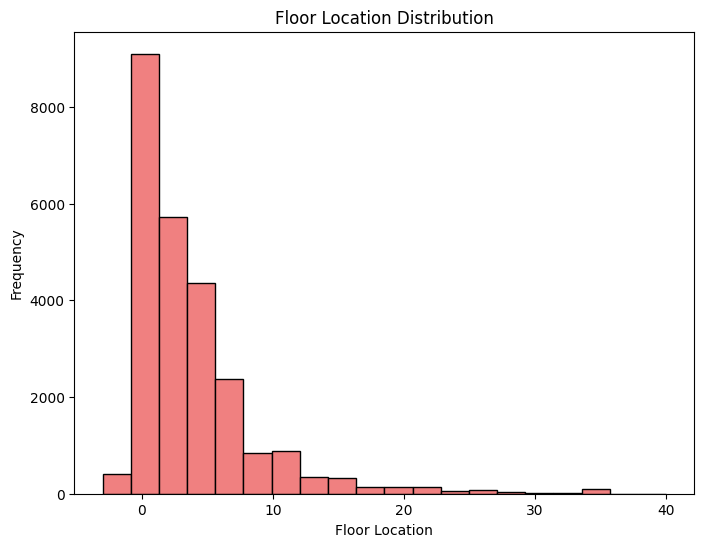

In [464]:
plt.figure(figsize=(8, 6))
plt.hist(df['FloorLocation'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Floor Location Distribution')
plt.xlabel('Floor Location')
plt.ylabel('Frequency')
plt.show()

In [465]:
print(df["BuildStatus"].value_counts())
print("Null:", df["BuildStatus"].isnull().sum())

BuildStatus
İkinci El           6409
Sıfır               4585
Yapım Aşamasında     237
Name: count, dtype: int64
Null: 13924


In [466]:
df = df.drop(columns = "BuildStatus")

Almost half of the dataset and is still null, let's just drop them.

Let's continue our data preprocessing.

In [467]:
print(df["StructureType"].value_counts())
print("Null:", df["StructureType"].isnull().sum())

StructureType
Betonarme    10214
Ahşap           59
Kagir           46
Çelik           34
Taş Bina        32
Yığma           16
Prefabrik        4
Kütük            1
Name: count, dtype: int64
Null: 14749


In [468]:
df["StructureType"] = df["StructureType"].map({"Betonarme": 0,
                                               "Ahşap": 1,
                                               "Kagir": 1,
                                               "Çelik": 1,
                                               "Taş Bina": 1,
                                               "Yığma": 1,
                                               "Prefabrik": 1,
                                               "Kütük": 1,
                                               np.nan : 0,
                                               })

In [469]:
print(df["ItemStatus"].value_counts())
print("Null:", df["ItemStatus"].isnull().sum())

ItemStatus
Boş       17491
Eşyalı      841
Name: count, dtype: int64
Null: 6823


In [470]:
df["ItemStatus"] = df["ItemStatus"].map({"Boş": 0,
                                         "Eşyalı": 1,
                                         np.nan: 0})

In [471]:
print(df["FloorLocation"].value_counts())
print("Null:", df["FloorLocation"].isnull().sum())

FloorLocation
 0.0     4121
 1.0     3368
 2.0     2908
 3.0     2819
 4.0     2595
 5.0     1760
 0.5     1585
 7.0     1297
 6.0     1072
 8.0      505
 10.0     428
 9.0      344
 11.0     240
-1.0      216
 12.0     216
 15.0     191
 13.0     176
 14.0     175
-2.0      136
 16.0     133
 21.0     107
 35.0     101
 17.0      81
 20.0      76
 19.0      67
 18.0      65
-3.0       48
 22.0      42
 26.0      38
 23.0      37
-0.5       29
 25.0      28
 24.0      28
 30.0      22
 28.0      20
 27.0      19
 29.0       9
 33.0       6
 32.0       3
 31.0       3
 40.0       3
 34.0       2
 38.0       1
 36.0       1
Name: count, dtype: int64
Null: 34


In [472]:
df['FloorLocation'] = df['FloorLocation'].fillna(0)

In [473]:
individual_floors = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 0.5, 6.0, 7.0, 8.0]
low_high_group = [9.0, 10.0, 11.0, 12.0, -1.0]
mid_high_group = [13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, -2.0, 35.0]
very_high_or_low_group = [22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0,
                          30.0, 31.0, 32.0, 33.0, 34.0, 36.0, 38.0, 40.0, -3.0, -0.5]

floor_map = {}

for val in individual_floors:
    floor_map[val] = val
for val in low_high_group:
    floor_map[val] = 9
for val in mid_high_group:
    floor_map[val] = 10
for val in very_high_or_low_group:
    floor_map[val] = 11

df['FloorLocation'] = df['FloorLocation'].map(floor_map)

In [474]:
print(df["Swap"].value_counts())
print("Null:", df["Swap"].isnull().sum())

Swap
Yok    17304
Var     3535
Name: count, dtype: int64
Null: 4316


In [475]:
df["Swap"] = df["Swap"].map({"Yok": 0,
                             "Var": 1})
df["Swap"] = df["Swap"].fillna(0)

In [476]:
import ast

def extract_city_district_from_str(address_str):
    try:
        address_list = ast.literal_eval(address_str)  # convert string to list
        city = address_list[2].split()[0]
        district = address_list[3].split()[0]
        return pd.Series([city, district])
    except:
        return pd.Series([None, None])

df[['city', 'region']] = df['address'].apply(extract_city_district_from_str)

In [477]:
df["region"].unique()

array(['Adalar', 'Arnavutköy', 'Ataşehir', 'Avcılar', 'Bağcılar',
       'Bahçelievler', 'Bakırköy', 'Başakşehir', 'Bayrampaşa', 'Beşiktaş',
       'Beykoz', 'Beylikdüzü', 'Beyoğlu', 'Şişli', 'Büyükçekmece',
       'Çatalca', 'Çekmeköy', 'Esenler', 'Esenyurt', 'Eyüpsultan',
       'Fatih', 'Gaziosmanpaşa', 'Güngören', 'Kadıköy', 'Kağıthane',
       'Kartal', 'Küçükçekmece', 'Maltepe', 'Pendik', 'Sancaktepe',
       'Ümraniye', 'Sarıyer', 'Şile', 'Silivri', 'Sultanbeyli',
       'Sultangazi', 'Tuzla', 'Üsküdar', 'Zeytinburnu'], dtype=object)

We created this feature but we already have the district column, so this becomes unnecessary.

In [478]:
df["city"].unique()

array(['İstanbul'], dtype=object)

This is also unnecessary here because the only city we have is already Istanbul. So we will also drop this columns to reduce the cost but this method will come very handy when we will deal with more complex datasets.

In [479]:
df = df.drop(columns='address')
df = df.drop(columns="city")
df = df.drop(columns="region")

### ✅ **2. Create the Model**

- **Create a baseline model**:
  - For regression problems: **DecisionTreeRegressor**  

- After training the model, **calculate performance metrics** such as MSE, R² (regression).  
- **Interpret the results:** How well did the model perform? Does it need improvement?

---

In [480]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X = df.drop(columns="price")
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [481]:
model = DecisionTreeRegressor(random_state=42)

In [482]:
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [483]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {np.sqrt(mse)}")
print(f"R²: {r2}")

RMSE: 0.6893072803754192
R²: 0.580245159225975


We have a good amount of MSE and R-squared for the beginning. By doing some more detailed data preprocessing we can get a higher R-squared and lower MSE level. For now, let's try other models and do hyperparameter optimization.

### ✅ **3. Hyperparameter Optimization**

- Use **GridSearchCV or RandomizedSearchCV** to identify the **best hyperparameters** for improving your model's performance.  
- **Test and compare the results**:
  - How did MSE, R² (regression) change after hyperparameter optimization?  
- **Interpret the results:** Has the model's performance improved?

---

In [484]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5]
}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Params:", best_params)

y_pred_best = best_model.predict(X_test)

mse_best = mean_squared_error(y_test, y_pred_best)
rmse = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Best Model - RMSE: {rmse:.4f}, R²: {r2_best:.4f}")

Best Params: {'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best Model - RMSE: 0.5937, R²: 0.6886


Our scores are getting better even only when we do a Grid Search Cross Validation.

### ✅ **4. Feature Engineering**

- Create **new features** or **remove unnecessary variables** to help the model learn better.  
- **For example**:
  - **Log transformation, square root, adding interaction features**  
  - **Feature selection to remove irrelevant variables**  
- **Train and test the new model.**  
- **Compare the results with previous models:**
  - Did the model perform better after feature engineering?

---

We already did the feature engineering part above, now let's check for feature importances.

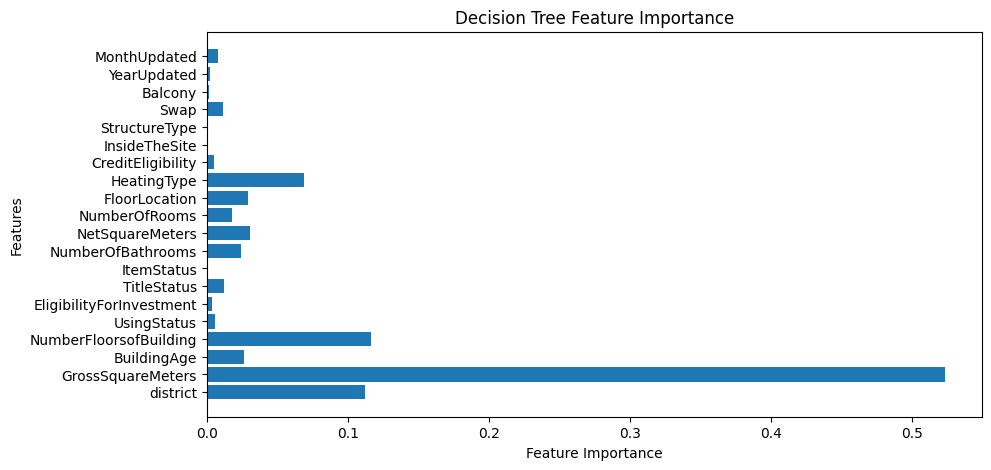

In [485]:
importances = best_model.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(10,5))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Decision Tree Feature Importance")
plt.show()

Let's select the important features and train new models.

In [486]:
important_features = ["HeatingType", "FloorLocation", "NumberOfRooms", "NetSquareMeters", "NumberOfBathrooms", "NumberFloorsofBuilding", "BuildingAge", "GrossSquareMeters", "district", "TitleStatus", "MonthUpdated"]
X_selected = X[important_features]

X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected, y, train_size=0.6, random_state=42)

tree_reg_sel = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_reg_sel.fit(X_train_sel, y_train_sel)

y_pred_sel = tree_reg_sel.predict(X_test_sel)

mse_sel = mean_squared_error(y_test_sel, y_pred_sel)
rmse = np.sqrt(mse_sel)
r2_sel = r2_score(y_test_sel, y_pred_sel)

print(f"Model with Important Features - RMSE: {rmse:.4f}, R²: {r2_sel:.4f}")

Model with Important Features - RMSE: 0.6685, R²: 0.6003


### ✅ **5. Trying Stronger Models**

- Try **Random Forest or XGBoost**.  
- **Run RandomForestRegressor or XGBRegressor on the same dataset.**  
- **Compare the results with the Decision Tree model:**
  - Do the new models perform better?  
  - Has the error rate decreased?

---

In [487]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_reg.fit(X_train_sel, y_train_sel)

y_pred_rf = rf_reg.predict(X_test_sel)

mse_rf = mean_squared_error(y_test_sel, y_pred_rf)
r2_rf = r2_score(y_test_sel, y_pred_rf)

print(f"Random Forest - RMSE: {np.sqrt(mse_rf):.4f}, R²: {r2_rf:.4f}")

Random Forest - RMSE: 0.5393, R²: 0.7399


Using random forest regression, we had our mse lower and r-squared higher.

In [488]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)
xgb_reg.fit(X_train_sel, y_train_sel)

y_pred_xgb = xgb_reg.predict(X_test_sel)

mse_xgb = mean_squared_error(y_test_sel, y_pred_xgb)
r2_xgb = r2_score(y_test_sel, y_pred_xgb)

print(f"XGBoost - MSE: {mse_xgb:.4f}, R²: {r2_xgb:.4f}")

XGBoost - MSE: 0.2135, R²: 0.8091


Obviously, selecting important features made an important impact!

In [490]:
from sklearn.model_selection import GridSearchCV
import time

start = time.time()
param_grid_rf = {
    "n_estimators": [200, 300],
    "max_depth": [10, 15],
    "min_samples_split": [10, 15],
    "min_samples_leaf": [2, 4]
}

grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring="neg_mean_squared_error")
grid_search_rf.fit(X_train, y_train)

end = time.time()

print("Grid Search lasted for: ", end-start)
print("Random Forest Best Parameters:", grid_search_rf.best_params_)

best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
rmse = np.sqrt(mse_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Random Forest (Optimized) - RMSE: {rmse:.4f}, R²: {r2_best_rf:.4f}")

Grid Search lasted for:  1003.1859076023102
Random Forest Best Parameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Random Forest (Optimized) - RMSE: 0.4918, R²: 0.7864


### Trying Ensemble Model

In [491]:
from sklearn.ensemble import StackingRegressor, RandomForestRegressor
from xgboost import XGBRegressor

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X[important_features], y, test_size=0.2, random_state=42)

stacked_model = StackingRegressor(
    estimators=[
        ("rf", RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)),
        ("xgb", XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42))
    ],
    final_estimator=XGBRegressor(n_estimators=50, max_depth=4, learning_rate=0.1, random_state=42)
)

stacked_model.fit(X_train_new, y_train_new)
y_pred_stack = stacked_model.predict(X_test_new)

mse_stack = mean_squared_error(y_test_new, y_pred_stack)
rmse = np.sqrt(mse_stack)
r2_stack = r2_score(y_test_new, y_pred_stack)

print(f"Stacking Model - RMSE: {rmse}, R²: {r2_stack:.4f}")

Stacking Model - RMSE: 0.4573331021504953, R²: 0.8169


In [493]:
param_grid_xgb = {
    "n_estimators": [200, 300],
    "max_depth": [6, 10],
    "learning_rate": [0.01, 0.05, 0.1]
}

grid_search_xgb = GridSearchCV(XGBRegressor(random_state=42), param_grid_xgb, cv=5, scoring="neg_mean_squared_error")
grid_search_xgb.fit(X_train_new, y_train_new)

print("XGBoost Best Parameters:", grid_search_xgb.best_params_)

best_xgb = grid_search_xgb.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test_new)

mse_best_xgb = mean_squared_error(y_test_new, y_pred_best_xgb)
rmse = np.sqrt(mse_best_xgb)
r2_best_xgb = r2_score(y_test_new, y_pred_best_xgb)

print(f"XGBoost (Better Optimization) - RMSE: {rmse:.4f}, R²: {r2_best_xgb:.4f}")

XGBoost Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300}
XGBoost (Better Optimization) - RMSE: 0.4375, R²: 0.8325


As we can easily see from here, we have increased our R-squared value and decreased our RMSE value, which were nonpositive values at the beginning!